# Modelling Snow Survey Data

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# import dataset (oliver)
df = pd.read_csv('/Users/oscaramirmansour/midterm_project/data/snow_survey_df6')
df

,Snow Course Name,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Density %,Survey Period,LATITUDE,LONGITUDE
0,YELLOWHEAD,1860,1951-03-30,168.0,528.0,31.0,01-Apr,52.90622,-118.547500
1,YELLOWHEAD,1860,1951-04-30,147.0,485.0,33.0,01-May,52.90622,-118.547500
2,YELLOWHEAD,1860,1951-05-19,89.0,320.0,36.0,15-May,52.90622,-118.547500
3,YELLOWHEAD,1860,1952-04-30,157.0,523.0,33.0,01-May,52.90622,-118.547500
4,YELLOWHEAD,1860,1952-05-19,79.0,264.0,33.0,15-May,52.90622,-118.547500
...,...,...,...,...,...,...,...,...,...
59049,STANLEY CREEK,930,1985-05-16,83.0,307.0,37.0,15-May,59.89627,-136.898406
59050,STANLEY CREEK,930,1986-03-02,142.0,320.0,23.0,01-Mar,59.89627,-136.898406
59051,STANLEY CREEK,930,1986-04-01,135.0,365.0,27.0,01-Apr,59.89627,-136.898406
59052,STANLEY CREEK,930,1986-05-01,121.0,400.0,33.0,01-May,59.89627,-136.898406


In [ ]:
# import working dataset (CP)
df = pd.read_csv("C:\\Users\\ca0pa\\midterm_project\\data\\snow_survey_df6")
df

We've opted to use a multivariate regression analysis (OLS) using Snow Depth as our dependent variable and Elevation, Latitude, and Density % as independent variables. We've decided not to use Water Equiv.mm because it is so highly correlated (because it was calculated from Snow Depth) with the dependent variable that it's bound to be significant (as seen in the CorrelationMatrix.png, found in the Output folder).

We suspect that elevation and latitude will be significantly positively correlated with elevation and latitude (due to their underlying tendency to product cooler environmental conditions that contribute to snow formation). We're interested to include Density % as an independent variable to investigate whether this adds predictive capacity to the model.

We've chosen an alpha value of 5%.

# Hypotheses 

H0: Independent variables will not be able to predict values of the dependent variable (no variables will have significance <= 0.05)

HA: At least one of our independent variables will be positively significant (p <= 0.05).

In [15]:
# Set up our regressors, and the constant
regressors = ['Elev. metres','Density %','LATITUDE']

x = sm.add_constant(df[regressors])

# Set up our dependent variable
y = df['Snow Depth cm']

In [16]:
# Create OLS regression
model = sm.OLS(y,x)

In [17]:
# fit the model
results = model.fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Snow Depth cm   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     5693.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:42:42   Log-Likelihood:            -3.4265e+05
No. Observations:               59054   AIC:                         6.853e+05
Df Residuals:                   59050   BIC:                         6.854e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -87.4468      7.494    -11.670      0.000    -102.134     -72.759
Elev. metres     0.0440      0.001     50.610      0.000       0.042       0.046
Density %        3.9441      0.037    107.986      0.000       3.873       4.016
LATITUDE         0.4450      0.131      3.397      0.001       0.188       0.702
==============================================================================
Omnibus:                    14445.829   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54014.943
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       7.035   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

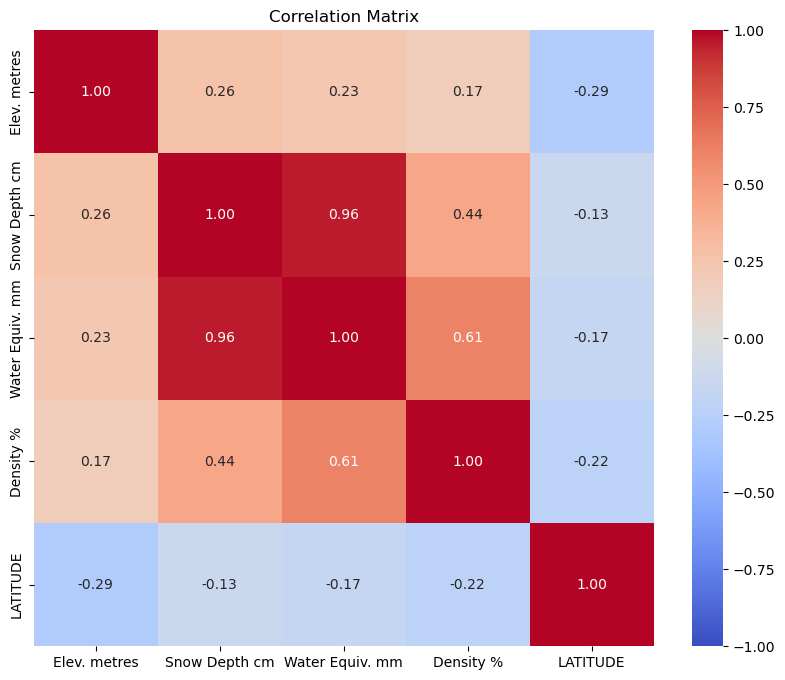

In [19]:
correlation_matrix = df[['Elev. metres', 'Snow Depth cm', 'Water Equiv. mm', 'Density %', 'LATITUDE']].corr()
correlation_matrix

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

plt.show()

# strong correlations between snow depth and water equivalence and density and water equivalence.

In [12]:
# Lets see if we can convert 'Date of Survey' to its julian date equivalent - it may improve predictive modelling where using julian dates instead of standard dates may improve model performance, where if time intervals between datapoints are irregular.

# coverting 'Date of Survey' to a datetime format from string
df['Date of Survey'] = pd.to_datetime(df['Date of Survey'])

In [13]:
# We'll create a new column instead - applying a lambda function, more specifcally converting every 'date of survey' value (x) to its julian date equivalent usign the .toordinal() function
df['Julian Date'] = df['Date of Survey'].apply(lambda x: x.toordinal())
df

,Snow Course Name,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Density %,Survey Period,LATITUDE,LONGITUDE,Julian Date
0,YELLOWHEAD,1860,1951-03-30,168.0,528.0,31.0,01-Apr,52.90622,-118.547500,712311
1,YELLOWHEAD,1860,1951-04-30,147.0,485.0,33.0,01-May,52.90622,-118.547500,712342
2,YELLOWHEAD,1860,1951-05-19,89.0,320.0,36.0,15-May,52.90622,-118.547500,712361
3,YELLOWHEAD,1860,1952-04-30,157.0,523.0,33.0,01-May,52.90622,-118.547500,712708
4,YELLOWHEAD,1860,1952-05-19,79.0,264.0,33.0,15-May,52.90622,-118.547500,712727
...,...,...,...,...,...,...,...,...,...,...
59049,STANLEY CREEK,930,1985-05-16,83.0,307.0,37.0,15-May,59.89627,-136.898406,724777
59050,STANLEY CREEK,930,1986-03-02,142.0,320.0,23.0,01-Mar,59.89627,-136.898406,725067
59051,STANLEY CREEK,930,1986-04-01,135.0,365.0,27.0,01-Apr,59.89627,-136.898406,725097
59052,STANLEY CREEK,930,1986-05-01,121.0,400.0,33.0,01-May,59.89627,-136.898406,725127


In [14]:
# Just want to see dataset ordered by 'Date of Survey' - lets not overwrite the original df

sorted_df = df.sort_values(by='Date of Survey')
sorted_df

,Snow Course Name,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Density %,Survey Period,LATITUDE,LONGITUDE,Julian Date
30370,GERRARD,1620,1935-03-22,152.0,389.0,26.0,01-Apr,50.566410,-117.221191,706459
11581,COQUITLAM LAKE,300,1935-03-23,3.0,3.0,10.0,01-Apr,49.363876,-122.804489,706460
34175,TROUT CREEK,1430,1935-03-28,91.0,246.0,27.0,01-Apr,49.737440,-120.184400,706465
34558,SUMMERLAND RESERVOIR,1280,1935-03-30,94.0,259.0,28.0,01-Apr,49.812910,-120.015490,706467
35243,GRAYSTOKE LAKE,1840,1935-04-03,122.0,320.0,26.0,01-Apr,49.988670,-118.868600,706471
...,...,...,...,...,...,...,...,...,...,...
42367,DOG MOUNTAIN,1080,2023-05-31,100.0,516.0,52.0,01-Jun,49.372643,-122.956760,738671
53097,KIDPRICE LAKE,1370,2023-05-31,23.0,118.0,51.0,01-Jun,53.864166,-127.440551,738671
16307,ADAMS RIVER,1720,2023-06-01,8.0,44.0,55.0,01-Jun,51.584060,-119.426700,738672
43339,ORCHID LAKE,1190,2023-06-13,78.0,426.0,55.0,15-June,49.536248,-123.052340,738684


In [16]:
# Lets run a second regression, including the Julian Date as a variable

regressors2 = ['Elev. metres','Density %','LATITUDE', 'Julian Date']

x2 = sm.add_constant(df[regressors2])

y2 = df['Snow Depth cm']


In [18]:
# Setting up model

model2 = sm.OLS(y2, x2)

In [19]:
# fitting our model

results2 = model.fit()

In [20]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Snow Depth cm   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4328.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:01:50   Log-Likelihood:            -3.4256e+05
No. Observations:               59054   AIC:                         6.851e+05
Df Residuals:                   59049   BIC:                         6.852e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          385.3786     35.945     10.721      0.000     314.926     455.831
Elev. metres     0.0446      0.001     51.362      0.000       0.043       0.046
Density %        3.9374      0.036    107.956      0.000       3.866       4.009
LATITUDE         0.6389      0.132      4.856      0.000       0.381       0.897
Julian Date     -0.0007   4.95e-05    -13.449      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    14313.830   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53216.318
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       7.005   Cond. No.                     7.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adj R-squared went up slightly...

## Still some room for improvement... Looking back to the EDA file, we plotted distributions of 4 variables, one of which is the variable we're trying to predict 'Snow Depth cm'. We noticed that its distribution is very much skewed and so we're going to try and log normalise it. For reference, here is the distribution plot again:


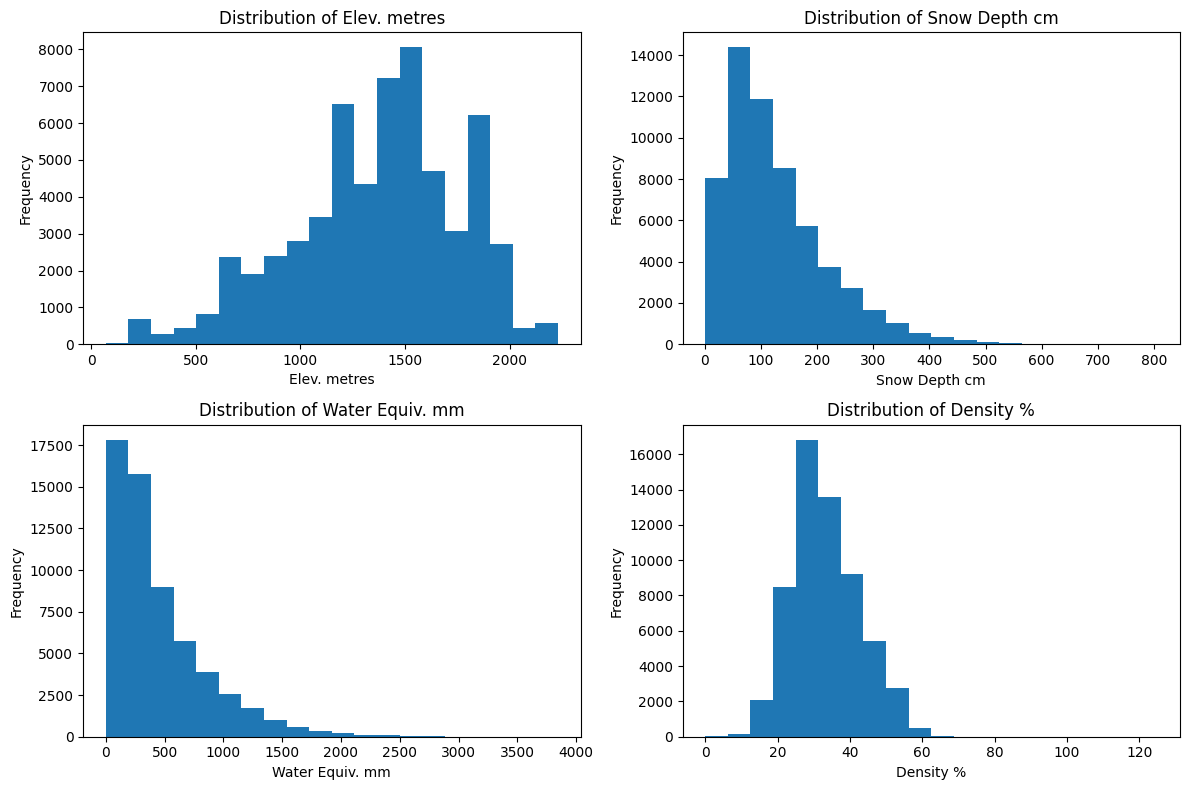

In [21]:
# Let's create histograms for the 'Elev. metres', 'Snow Depth cm', 'Water Equiv. mm' and 'Density'. Given the overwhelming presence of NaN values in 'Survey Code' and 'Snow Line Elev. m' we wont be using those columns and they will be dropped in cleaning, just before modelling.

# Variables we want to plot
variables = ['Elev. metres', 'Snow Depth cm', 'Water Equiv. mm', 'Density %']

# creating the plots and sizes we want
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# because axes is a 2D array, flatten converts it into a 1D array which makes it easier to iterate through.
axes = axes.flatten()

# enumerating through all our variables and creating histograms for each.
for i, variable in enumerate(variables):
    axes[i].hist(df[variable], bins = 20)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {variable}')

# fit plots, ensuring no overlapping..
plt.tight_layout()

# Saving image to output folder - filepath for output folder:
output_folder = '/Users/oscaramirmansour/midterm_project/output/'

filename = 'Histograms.png'

output_path = output_folder + filename

plt.savefig(output_path)

plt.show()

In [25]:
# Lets log the Snow Depth cm - ofcourse this will alter how we interpret the results
df['LOG Snow Depth cm'] = np.log(df['Snow Depth cm'])
df


,Snow Course Name,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Density %,Survey Period,LATITUDE,LONGITUDE,Julian Date,LOG Snow Depth cm
0,YELLOWHEAD,1860,1951-03-30,168.0,528.0,31.0,01-Apr,52.90622,-118.547500,712311,5.123964
1,YELLOWHEAD,1860,1951-04-30,147.0,485.0,33.0,01-May,52.90622,-118.547500,712342,4.990433
2,YELLOWHEAD,1860,1951-05-19,89.0,320.0,36.0,15-May,52.90622,-118.547500,712361,4.488636
3,YELLOWHEAD,1860,1952-04-30,157.0,523.0,33.0,01-May,52.90622,-118.547500,712708,5.056246
4,YELLOWHEAD,1860,1952-05-19,79.0,264.0,33.0,15-May,52.90622,-118.547500,712727,4.369448
...,...,...,...,...,...,...,...,...,...,...,...
59049,STANLEY CREEK,930,1985-05-16,83.0,307.0,37.0,15-May,59.89627,-136.898406,724777,4.418841
59050,STANLEY CREEK,930,1986-03-02,142.0,320.0,23.0,01-Mar,59.89627,-136.898406,725067,4.955827
59051,STANLEY CREEK,930,1986-04-01,135.0,365.0,27.0,01-Apr,59.89627,-136.898406,725097,4.905275
59052,STANLEY CREEK,930,1986-05-01,121.0,400.0,33.0,01-May,59.89627,-136.898406,725127,4.795791


In [26]:
# Lets run another regression with our dependant variable now log'd

regressors3 = ['Elev. metres','Density %','LATITUDE', 'Julian Date']

x3 = sm.add_constant(df[regressors2])

y3 = df['LOG Snow Depth cm']

In [27]:
model3 = sm.OLS(y3, x3)

In [28]:
results3 = model.fit()

In [29]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Snow Depth cm   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4328.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:13:18   Log-Likelihood:            -3.4256e+05
No. Observations:               59054   AIC:                         6.851e+05
Df Residuals:                   59049   BIC:                         6.852e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          385.3786     35.945     10.721      0.000     314.926     455.831
Elev. metres     0.0446      0.001     51.362      0.000       0.043       0.046
Density %        3.9374      0.036    107.956      0.000       3.866       4.009
LATITUDE         0.6389      0.132      4.856      0.000       0.381       0.897
Julian Date     -0.0007   4.95e-05    -13.449      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    14313.830   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53216.318
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       7.005   Cond. No.                     7.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""